# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* строить простую предсказательную модель


* (бонус) конструировать новые признаки

Основы matplotlib: https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [3]:
data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [6]:
data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [7]:
data = data[data.Sex != 'unknown'] #можно через drop
data.shape

(886, 12)

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [8]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 886, dtype: int64

Посмотрим, как влияет пол на выживаемость.

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


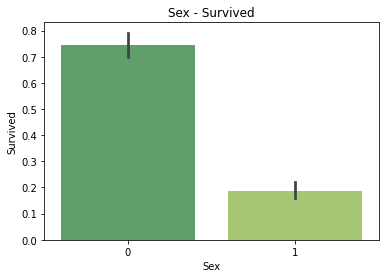

In [10]:
sns.barplot(x='Sex', y='Survived', data=data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

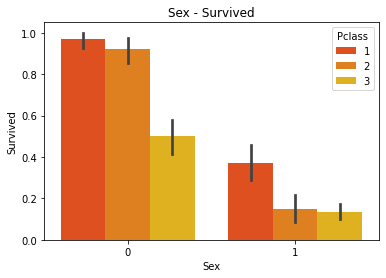

In [11]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

c:\users\wwsla\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


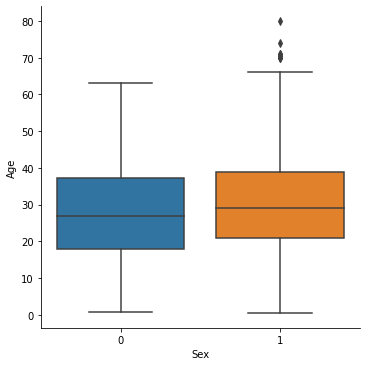

In [12]:
sns.factorplot(x="Sex", y="Age", data=data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

c:\users\wwsla\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


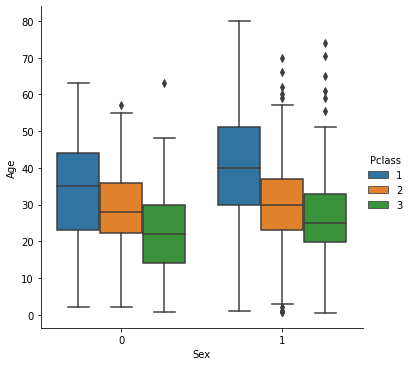

In [13]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [14]:
print(data['Embarked'].value_counts(dropna=False))
data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [15]:
data.dropna(subset=["Embarked"], inplace=True)
data.shape

(884, 12)

**Задание 7.** Удалите из таблицы Data столбец Embarked.

In [16]:
data.drop("Embarked", axis=1, inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [ ]:
#your code here

Заполним пропуски медианным значением Age.

In [18]:
median_age = data['Age'].median()

data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

c:\users\wwsla\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


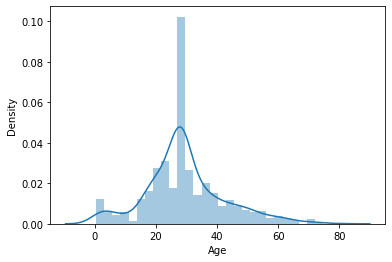

In [19]:
sns.distplot(data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

c:\users\wwsla\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


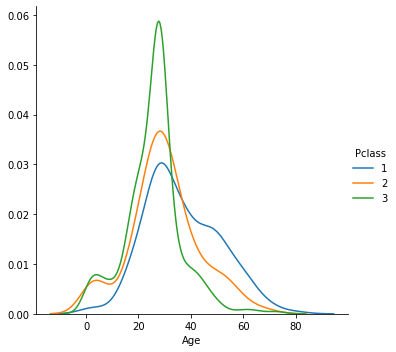

In [20]:
import seaborn as sns

facet = sns.FacetGrid(data = data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверим, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполним их медианным значением Fare

In [21]:
data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.3000      1
13.7917     1
14.1083     1
9.8375      1
17.4000     1
Name: Fare, Length: 246, dtype: int64

**Обработаем признак 'Pclass'**

In [22]:
data['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

In [23]:
data['Pclass'].isna().sum()

0

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

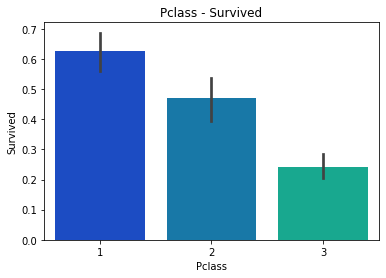

In [24]:
sns.barplot(x='Pclass', y='Survived', data=data, palette='winter')
plt.title('Pclass - Survived')
plt.show()

Столбец PassengerId является категориальным и не несёт важной информации, удалим его.

In [25]:
data.drop('PassengerId',axis=1,inplace=True)

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

Создадим таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [27]:
NumericData = data._get_numeric_data()
NumericData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

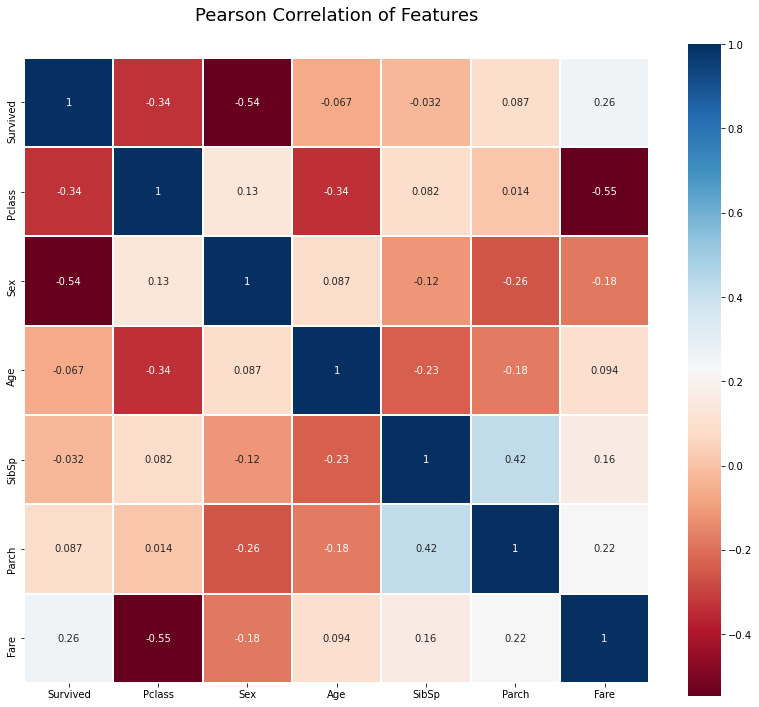

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

c:\users\wwsla\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


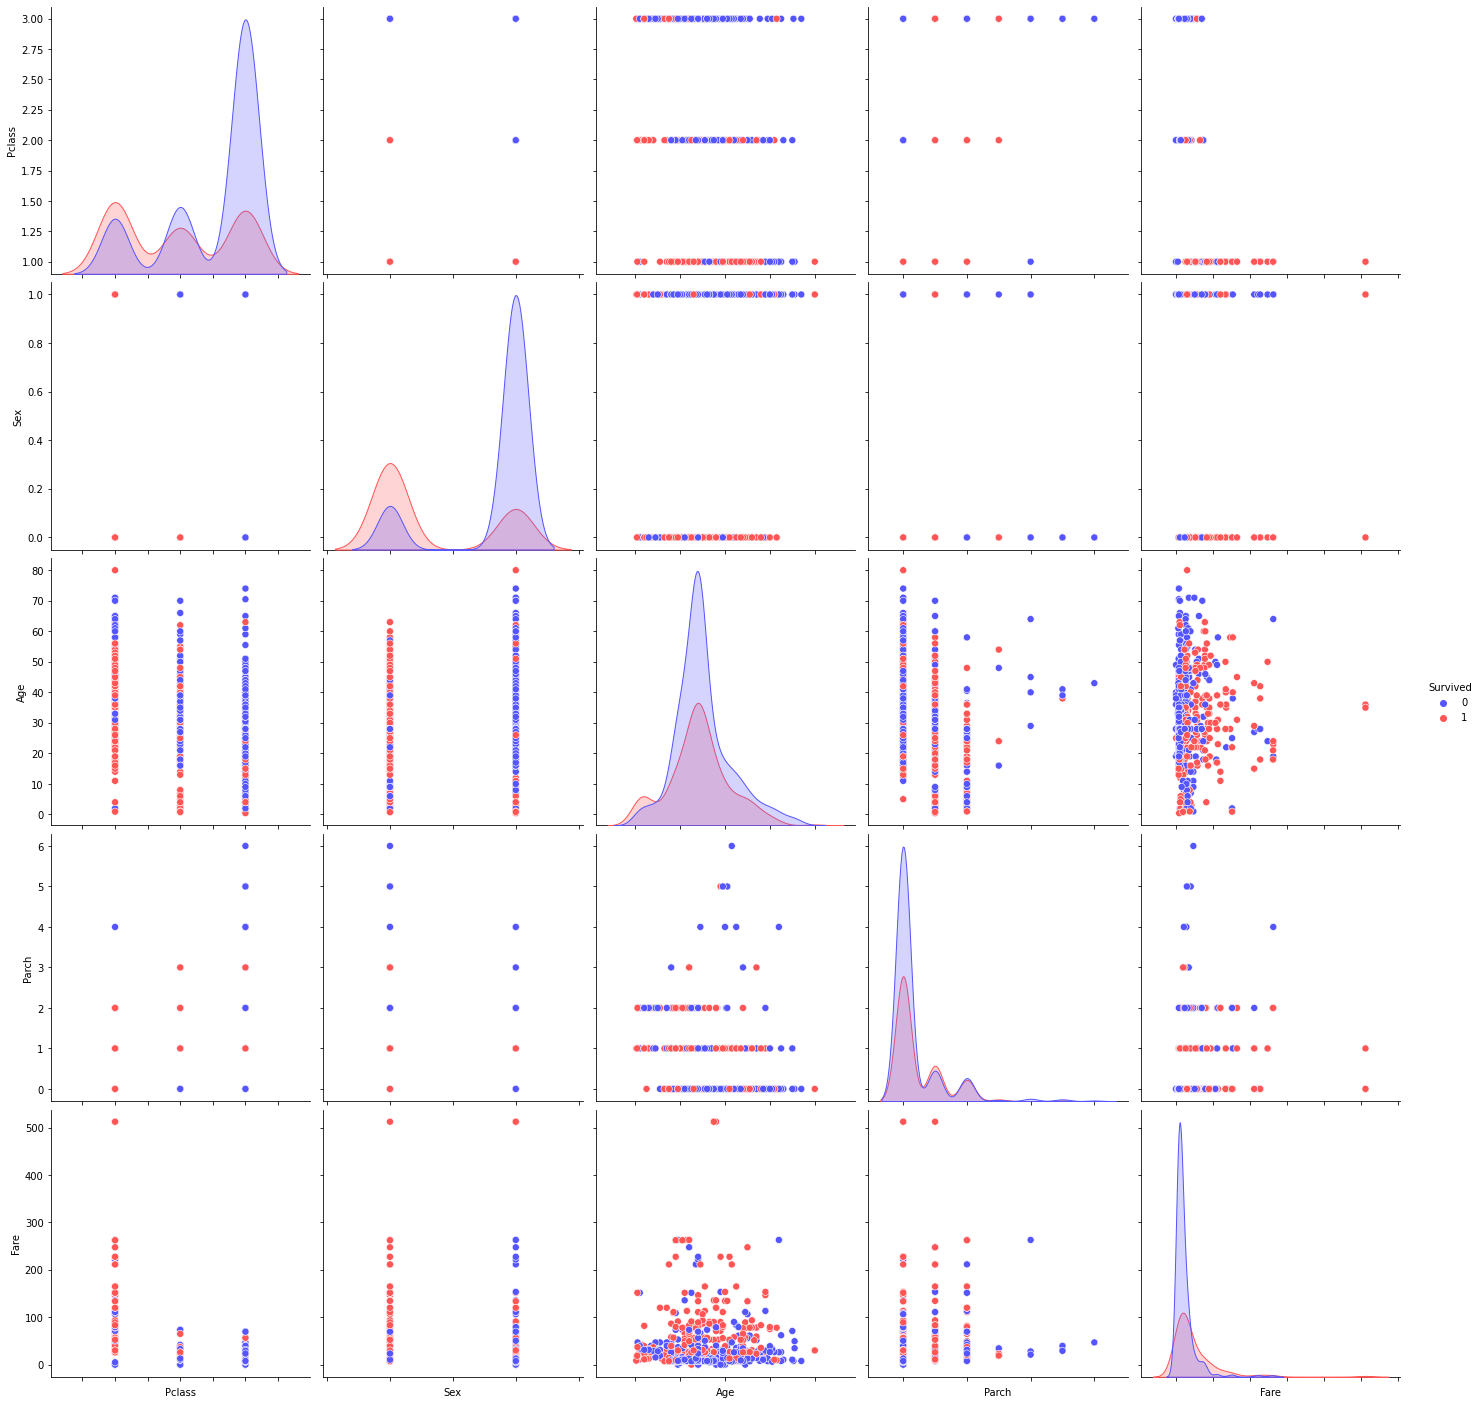

In [29]:
g = sns.pairplot(data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

### Получение простого предсказания.

Мы видим, что больше всего влияют на выживаемость пол и класс:
* женщины, как правило, выживали
* мужчины, да ещё небогатые - нет
* больше погибших, чем выживших

In [30]:
def first_prediction(x):
    if x.Sex == 0:
        return 1
    if x.Sex == 1 and x.Pclass > 1:
        return 0
    return 0

In [31]:
data['prediction'] = data.apply(lambda x: first_prediction(x), axis=1)
data[['Survived','prediction']]

,Survived,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


Посмотрим на качество нашего предсказания.

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(data['Survived'], data['prediction'])

0.7873303167420814

## Бонусная часть - домашнее задание (+1 балл к итоговой оценке).

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [33]:
data['AgeBin'] = pd.cut(data['Age'].astype(int), 5)

data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder. Полученные метки уже можно использовать как числовые признаки.

In [34]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['AgeBin_Code'] = label.fit_transform(data['AgeBin'])

data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 9.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [37]:
data['FareBin'] = pd.qcut(data['Fare'].astype(int), 4)

data['FareBin'].head()

0    (-0.001, 7.0]
1    (31.0, 512.0]
2    (-0.001, 7.0]
3    (31.0, 512.0]
4      (7.0, 14.0]
Name: FareBin, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.0] < (7.0, 14.0] < (14.0, 31.0] < (31.0, 512.0]]

In [38]:
label = LabelEncoder()

data['FareBin_Code'] = label.fit_transform(data['FareBin'])

data[['Fare','FareBin','FareBin_Code']].head()

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.001, 7.0]",0
1,71.2833,"(31.0, 512.0]",3
2,7.9250,"(-0.001, 7.0]",0
3,53.1000,"(31.0, 512.0]",3
4,8.0500,"(7.0, 14.0]",1


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 10.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [72]:
data['NameLen'] = data['Name'].apply(lambda x: len(x))

data['FamilySize'] = data[['Parch', 'SibSp']].apply(lambda x: x[0] + x[1] + 1, axis=1)

data['IsAlone'] = data['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
#1 если пассажир 1, 0 иначе

#data.drop('prediction', axis=1, inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeBin_Code,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,1,0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,2,3,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,2,3,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,2,1,24,1,1


Единицу к FamilySize добавляют, чтобы учесть самого человека

**Задание 11**. Выведите на экран визуализации, отражающие влияние новых созданных признаков на целевую переменную (Survived). Тип визуализации остается на ваше усмотрение.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

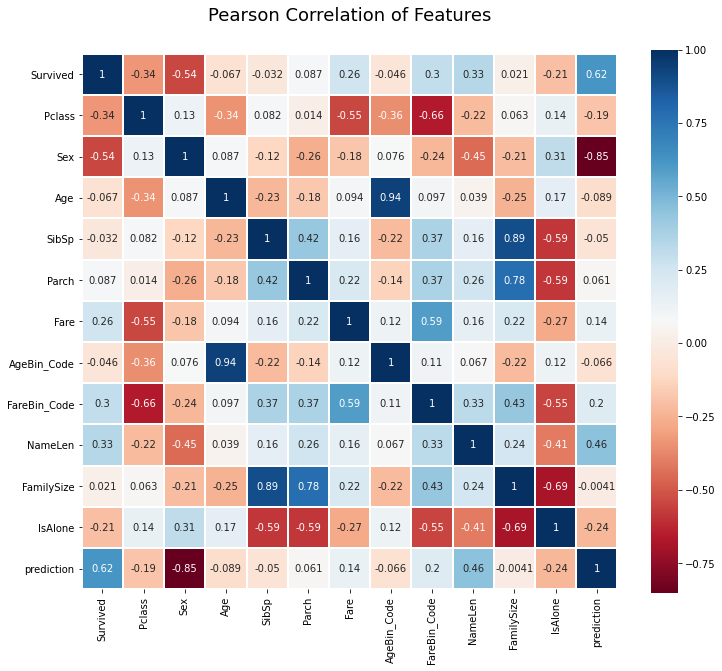

In [153]:
NumericData = data._get_numeric_data()

colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Задание 12.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

Сильнее всего все еще коррелируют с выживанием пол и класс человека. Из новых признаков сильнее всего корреляция с FareBin_Code и NameLen. И чуть ниже корреляция с IsAlone.
С остальными признаками корреляция низкая

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 13*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью. Визуализируйте влияние новых признаков на целевую переменную.

**Задание 14.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

Не обязательно, признак возможно можно использовать в сочетании с другими признаками. 
Например, Parch и SibSp имеют довольно низкую корреляцию по отдальности, но IsAlone, при создании которого они используются имеет более высокую корреляцию.

**Задание 15.** Попробуйте улучшить предсказание нашей модели, используя, кроме признаков Sex и Pclass, другие признаки.

In [154]:
def first_prediction(x):
    if x.Sex == 0 and 7 < x.Age < 13:
        return 0
    if x.FamilySize > 4:
        return 0
    if x.Sex == 0:
        return 1
    if x.Age < 4 or x.Age > 75:
        return 1
    if x.NameLen > 40:
        return 1
    if x.Pclass > 1:
        return 0
    return 0

data['prediction'] = data.apply(lambda x: first_prediction(x), axis=1)

accuracy_score(data['Survived'], data['prediction'])

0.8223981900452488